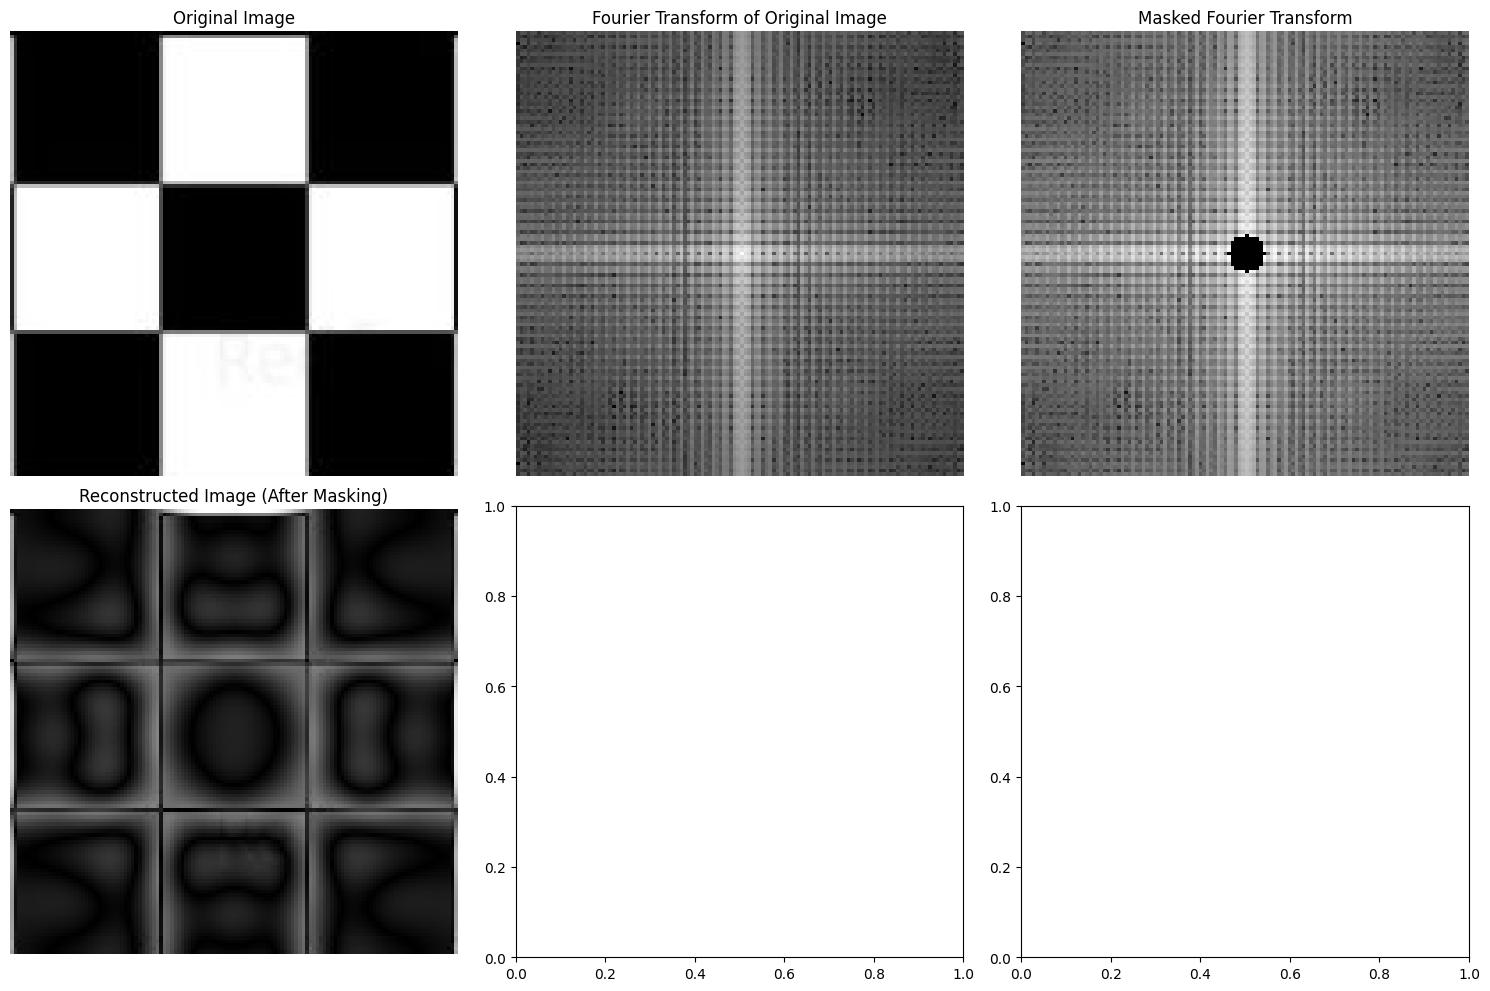

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Dataset/Dft images /brick-wall-1916752_1280.png', cv2.IMREAD_GRAYSCALE)


# Step 2: Perform Fourier Transform (Shifted)
def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)  # Shift zero frequency component to center
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return fshift, magnitude_spectrum

fshift, magnitude_spectrum = fourier_transform(image)

# Step 3: Apply Circular Mask to the Fourier Representation
def apply_circular_mask(fshift, radius):
    rows, cols = fshift.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image (zero frequency)

    # Create a circular mask
    mask = np.ones((rows, cols), dtype=np.uint8)
    Y, X = np.ogrid[:rows, :cols]
    mask_area = (X - ccol) ** 2 + (Y - crow) ** 2 <= radius ** 2
    mask[mask_area] = 0  # Set the circular region to 0
    
    # Apply the mask to the Fourier transform
    fshift[mask == 0] = 0
    return fshift, mask

radius = 5  # Set the radius of the circular region to be removed
fshift_masked, mask = apply_circular_mask(fshift.copy(), radius)

# Step 4: Inverse Fourier Transform (Shifted)
def inverse_fourier_transform(fshift):
    f_ishift = np.fft.ifftshift(fshift)  # Inverse shift to move zero frequency to top-left
    image_back = np.fft.ifft2(f_ishift)
    return np.abs(image_back)

reconstructed_image = inverse_fourier_transform(fshift_masked)

# Step 5: Plot all the stages

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original Image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Fourier Transform of the Original Image
axs[0, 1].imshow(magnitude_spectrum, cmap='gray')
axs[0, 1].set_title('Fourier Transform of Original Image')
axs[0, 1].axis('off')

# Masked Fourier Transform
magnitude_spectrum_masked = np.log(np.abs(fshift_masked) + 1)
axs[0, 2].imshow(magnitude_spectrum_masked, cmap='gray')
axs[0, 2].set_title('Masked Fourier Transform')
axs[0, 2].axis('off')

# Reconstructed Image (After Inverse FFT)
axs[1, 0].imshow(reconstructed_image, cmap='gray')
axs[1, 0].set_title('Reconstructed Image (After Masking)')
axs[1, 0].axis('off')

plt.tight_layout()
plt.show()

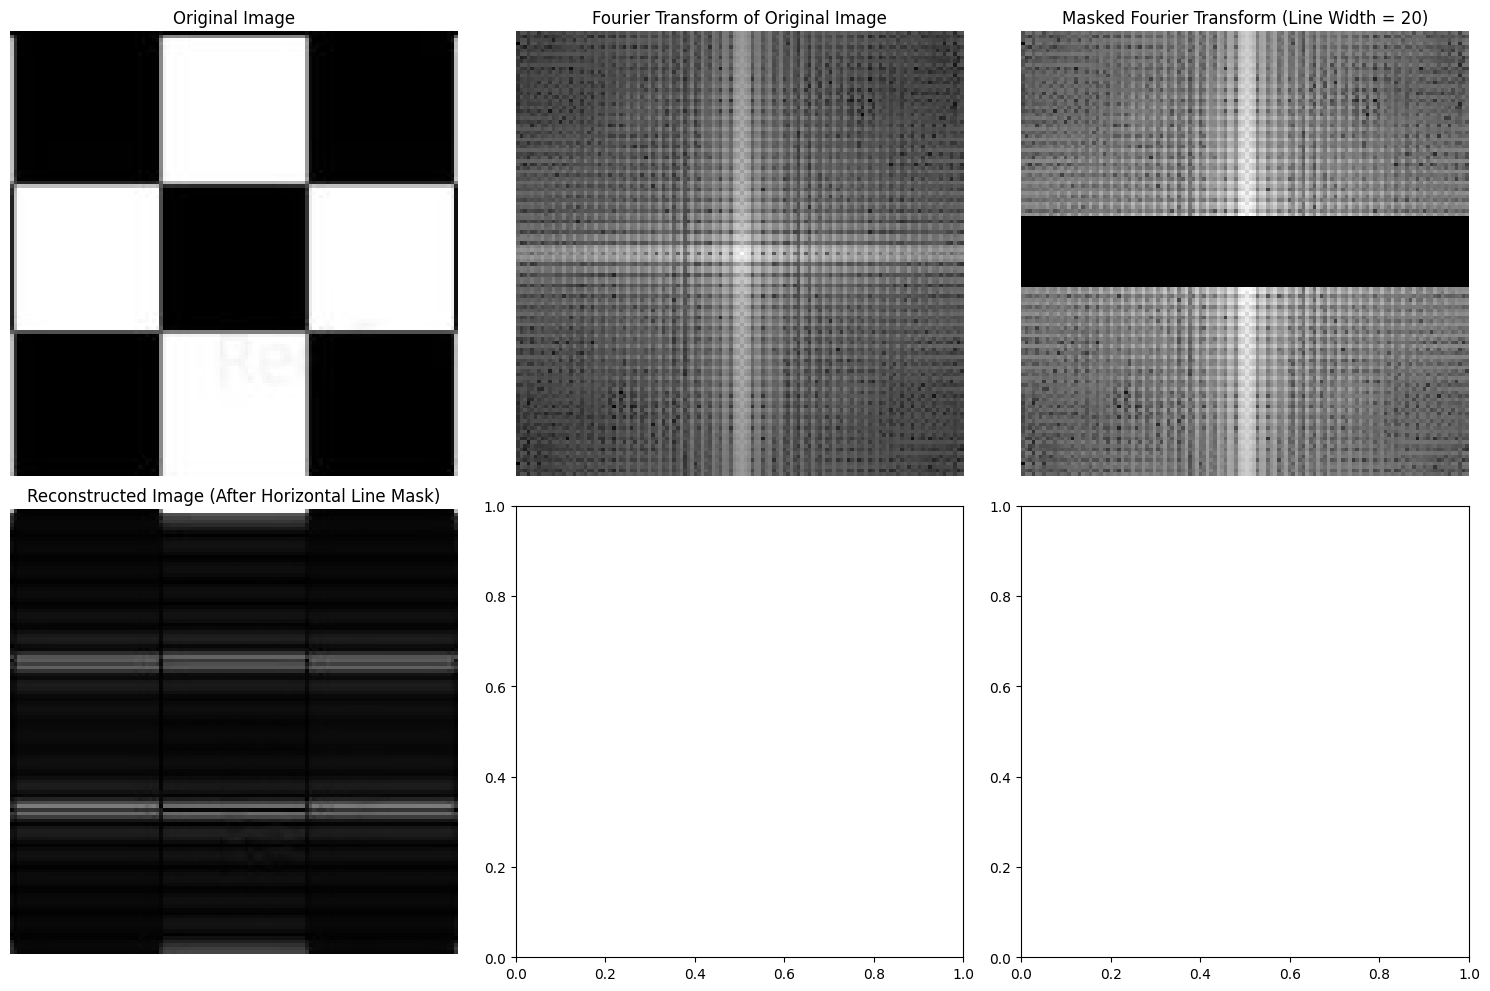

In [47]:

# Step 2: Perform Fourier Transform (Shifted)
def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)  # Shift zero frequency component to center
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return fshift, magnitude_spectrum

fshift, magnitude_spectrum = fourier_transform(image)

# Step 3: Apply Horizontal Line Mask with Specified Width
def apply_horizontal_line_mask(fshift, y_position, line_width):
    rows, cols = fshift.shape
    
    # Create a mask with ones everywhere
    mask = np.ones((rows, cols), dtype=np.uint8)
    
    # Set a range of rows (with specified width) around y_position to zero
    mask[max(0, y_position - line_width // 2):min(rows, y_position + line_width // 2), :] = 0
    
    # Apply the mask to the Fourier transform
    fshift[mask == 0] = 0
    return fshift, mask

# Define line width
line_width = 20 # Width of the line (can be adjusted)
y_position = fshift.shape[0] // 2  # Middle of the y-axis (horizontal line)

fshift_masked, mask = apply_horizontal_line_mask(fshift.copy(), y_position, line_width)

# Step 4: Inverse Fourier Transform (Shifted)
def inverse_fourier_transform(fshift):
    f_ishift = np.fft.ifftshift(fshift)  # Inverse shift to move zero frequency to top-left
    image_back = np.fft.ifft2(f_ishift)
    return np.abs(image_back)

reconstructed_image = inverse_fourier_transform(fshift_masked)

# Step 5: Plot all the stages

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original Image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Fourier Transform of the Original Image
axs[0, 1].imshow(magnitude_spectrum, cmap='gray')
axs[0, 1].set_title('Fourier Transform of Original Image')
axs[0, 1].axis('off')

# Masked Fourier Transform
magnitude_spectrum_masked = np.log(np.abs(fshift_masked) + 1)
axs[0, 2].imshow(magnitude_spectrum_masked, cmap='gray')
axs[0, 2].set_title(f'Masked Fourier Transform (Line Width = {line_width})')
axs[0, 2].axis('off')

# Reconstructed Image (After Inverse FFT)
axs[1, 0].imshow(reconstructed_image, cmap='gray')
axs[1, 0].set_title('Reconstructed Image (After Horizontal Line Mask)')
axs[1, 0].axis('off')

plt.tight_layout()
plt.show()

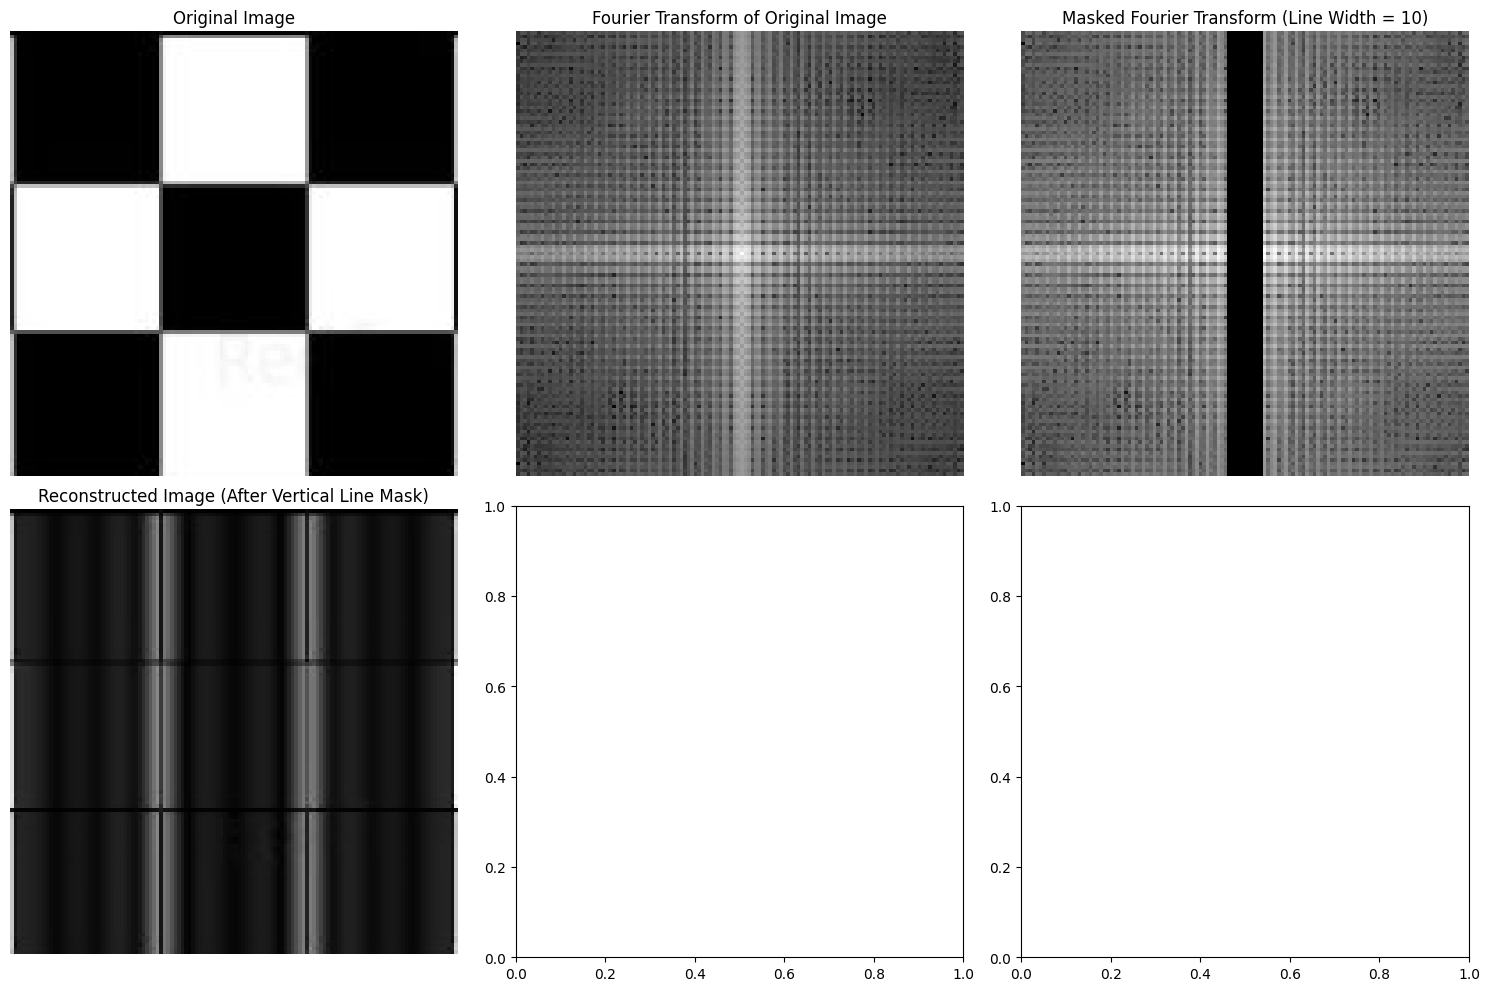

In [48]:

# Step 2: Perform Fourier Transform (Shifted)
def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)  # Shift zero frequency component to center
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return fshift, magnitude_spectrum

fshift, magnitude_spectrum = fourier_transform(image)

# Step 3: Apply Vertical Line Mask with Specified Width
def apply_vertical_line_mask(fshift, x_position, line_width):
    rows, cols = fshift.shape
    
    # Create a mask with ones everywhere
    mask = np.ones((rows, cols), dtype=np.uint8)
    
    # Set a range of columns (with specified width) around x_position to zero
    mask[:, max(0, x_position - line_width // 2):min(cols, x_position + line_width // 2)] = 0
    
    # Apply the mask to the Fourier transform
    fshift[mask == 0] = 0
    return fshift, mask

# Define line width
line_width = 10  # Width of the line (can be adjusted)
x_position = fshift.shape[1] // 2  # Middle of the x-axis (vertical line)

fshift_masked, mask = apply_vertical_line_mask(fshift.copy(), x_position, line_width)

# Step 4: Inverse Fourier Transform (Shifted)
def inverse_fourier_transform(fshift):
    f_ishift = np.fft.ifftshift(fshift)  # Inverse shift to move zero frequency to top-left
    image_back = np.fft.ifft2(f_ishift)
    return np.abs(image_back)

reconstructed_image = inverse_fourier_transform(fshift_masked)

# Step 5: Plot all the stages

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original Image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Fourier Transform of the Original Image
axs[0, 1].imshow(magnitude_spectrum, cmap='gray')
axs[0, 1].set_title('Fourier Transform of Original Image')
axs[0, 1].axis('off')

# Masked Fourier Transform
magnitude_spectrum_masked = np.log(np.abs(fshift_masked) + 1)
axs[0, 2].imshow(magnitude_spectrum_masked, cmap='gray')
axs[0, 2].set_title(f'Masked Fourier Transform (Line Width = {line_width})')
axs[0, 2].axis('off')

# Reconstructed Image (After Inverse FFT)
axs[1, 0].imshow(reconstructed_image, cmap='gray')
axs[1, 0].set_title('Reconstructed Image (After Vertical Line Mask)')
axs[1, 0].axis('off')

plt.tight_layout()
plt.show()
